# Coding project - Picture enhancement
Write code that automatically enhances a photograph.

First, we have to read the original image and assign it to a variable. 




In [1]:
from skimage.io import imread

#Read the original image
originalImage = imread('beach.jpg')

Then, we want to create a filtered image, and display both of them. To start, we will just copy the original image.
This code will be our base, we will duplicate it for every enhancements to see the different filters.

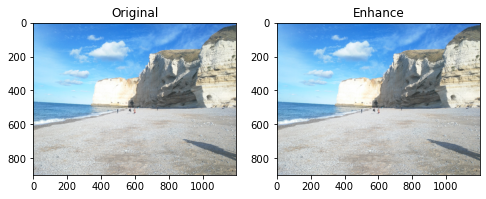

In [2]:
from skimage.io import imshow
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

#create the filter image
filteredImage = originalImage

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

# BLACK & WHITE ENHANCEMENTS

# 1. Noise reduction
We will use the median function to reduce the noise on the picture. Since it's a function that only works with black and white images, we need to apply it to every channels of the picture.

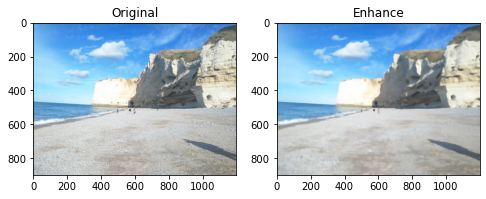

In [3]:
from skimage.morphology import disk
from skimage.filters.rank import median

#Read the original image as filtered image
filteredImage = imread('beach.jpg')

#create the filter image
filteredImage[:,:,0] = median(filteredImage[:,:,0], selem=disk(6))
filteredImage[:,:,1] = median(filteredImage[:,:,1], selem=disk(6))
filteredImage[:,:,2] = median(filteredImage[:,:,2], selem=disk(6))

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

The noise reduction made the picture a little blurry. We can change the disk to alterate the filter.

# 2. Auto-level
We will use the auto-level function, from the same library.

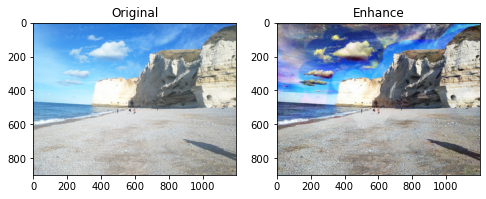

In [4]:
from skimage.filters.rank import autolevel

#Read the original image
filteredImage = imread('beach.jpg')
#create the filter image
filteredImage[:,:,0] = autolevel(filteredImage[:,:,0], selem=disk(60))
filteredImage[:,:,1] = autolevel(filteredImage[:,:,1], selem=disk(60))
filteredImage[:,:,2] = autolevel(filteredImage[:,:,2], selem=disk(60))

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

This filter make a big change on the image, the color are darker. It give to the image a artistic look.

# 3. Contrast Enhancement
Also in the same library (skimage.filters.rank), there is an enhance_contrast function.

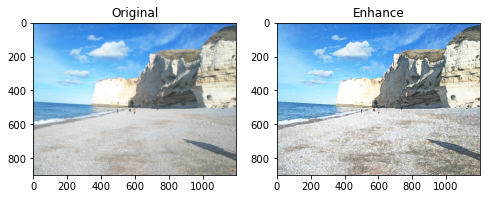

In [5]:
from skimage.filters.rank import enhance_contrast

#Read the original image
filteredImage = imread('beach.jpg')

#create the filter image
filteredImage[:,:,0] = enhance_contrast(filteredImage[:,:,0], selem=disk(5))
filteredImage[:,:,1] = enhance_contrast(filteredImage[:,:,1], selem=disk(5))
filteredImage[:,:,2] = enhance_contrast(filteredImage[:,:,2], selem=disk(5))

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

We can see that the filtered image is clearer than the original one. This is the best enhancement we found for the moment.

# 4. Local Otsu
The last enhancement of this section is Otsu. It performs automatic image thresholding.

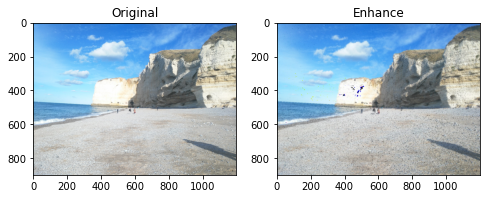

In [6]:
from skimage.filters.rank import otsu

#Read the original image
filteredImage = imread('beach.jpg')

#create the filter image
filteredImage[:,:,0] = otsu(filteredImage[:,:,0], selem=disk(2))
filteredImage[:,:,1] = otsu(filteredImage[:,:,1], selem=disk(2))
filteredImage[:,:,2] = otsu(filteredImage[:,:,2], selem=disk(2))

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

This filter also give clarity, but for this image, it adds some blue pixels that are not needed.

# COLOR ENHANCEMENT

# 1. Noise reduction
In another library, there is a noise reduction function that doesn't need to be apply to every channels.

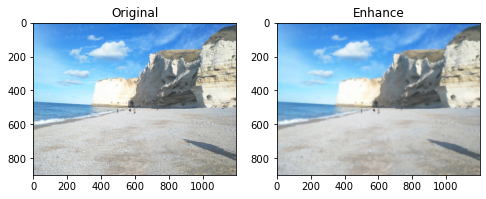

In [7]:
from skimage.restoration import denoise_tv_chambolle

#Read the original image
originalImage = imread('beach.jpg')

#create the filter image
filteredImage = denoise_tv_chambolle(originalImage, weight=0.2, multichannel=True)

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

The result is the same than the previous one : a blurry image. We can also change the weight of the filter, but this one take more time to run. Also, you can see that we applied "multichannel=True" because it is a colored image.

# 2. Gamma Correction
In the library skimage.exposure, there is a function that can adjust the gamma. It encodes and decodes luminance in a picture. You can change the second parameter to choose the gamma correction you want. Here the best result was with the 2.

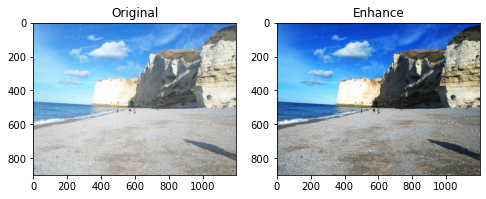

In [8]:
from skimage.exposure import adjust_gamma

#Read the original image
filteredImage = imread('beach.jpg')
#create the filter image
filteredImage = adjust_gamma(filteredImage, 2)

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

This filter, like the contrast one, make the color more powerful in the image.It can be a good enhancement for those who wants a more colorful picture. But it is still an "artistic" enhancement because it change too much the original image.

# 3. Logarithmic Correction
There is another function that applies a logarithmic correction to the image. 

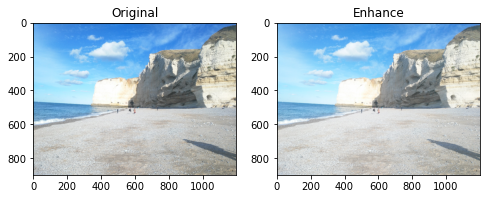

In [9]:
from skimage.exposure import adjust_log

#Read the original image
filteredImage = imread('beach.jpg')

#create the filter image
filteredImage = adjust_log(filteredImage, 1)

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

This correction is also making the picture blurry, it is like the opposite of the gamma correction.

# 4. Sigmoid Correction
Our last filter will apply a sigmoid correction to the picture.

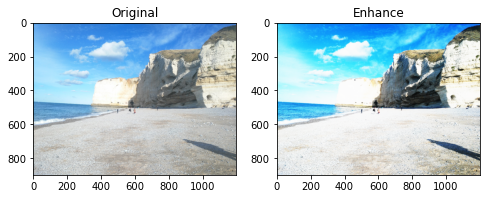

In [10]:
    from skimage.exposure import adjust_sigmoid

#Read the original image
filteredImage = imread('beach.jpg')

#create the filter image
filteredImage = adjust_sigmoid(filteredImage, 0.5)

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

As you can see, the colors changed a little bit, but it is a smaller changement. This filter can be great to make a enhancement.

# 5. Increase color saturation


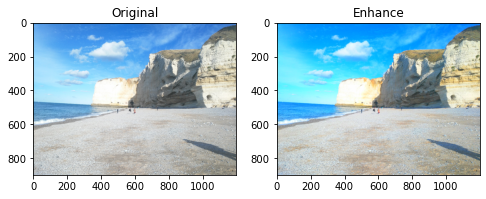

In [13]:
from PIL import Image, ImageEnhance

#Read the original image
originalImage = Image.open('beach.jpg')

#create the filter image
converter = ImageEnhance.Color(originalImage)
filteredImage = converter.enhance(2.0)

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

In [ ]:
When you increase the color saturation with a parameter of 2.0, the color are better and brighter. This is an enhancement that can be very great to apply on a picture that can seems too grey.

# Final enhancements
The two fitlers that can be great to mixed are the Contrast correction and the sigmoid correction. Here, we will try to apply both of them.
If we want the best enhancement, it is a great idea to mixed two correction such as noice reduction and color saturation. But it is better not to mixed two color filter such as sigmoid correction and gamma correction for example. Because there are both working on the colors. It is better to uste change the parameter of the correction for example.

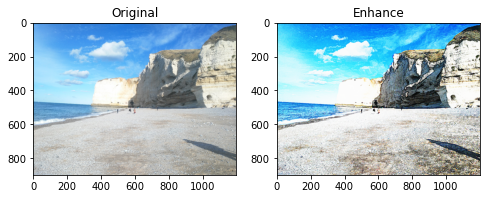

In [16]:

#Read the original image
filteredImage = imread('beach.jpg')

#create the filter image
filteredImage[:,:,0] = enhance_contrast(filteredImage[:,:,0], selem=disk(5))
filteredImage[:,:,1] = enhance_contrast(filteredImage[:,:,1], selem=disk(5))
filteredImage[:,:,2] = enhance_contrast(filteredImage[:,:,2], selem=disk(5))

#create the filter image
filteredImage = adjust_sigmoid(filteredImage, 0.5)

#Read the original image
originalImage = imread('beach.jpg')

#Display the original image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(originalImage, cmap=cm.gray)
plt.title('Original')

#Display the filtered image
plt.subplot(1,2,2)
plt.imshow(filteredImage, cmap=cm.gray)
plt.title('Enhance')
plt.show()

In [ ]:
The final result make the image almost look like a cartoon. Applying too much filters alterate the original image. The contrast enhancement and the color saturation stay the best solutions (together or separatly) for a small but great enhancement. This final picture is, for me, a good picture enhancement, but for some people it can be too much.